## Data source

https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset/data

## Questions

1. **Is there a correlation between Agent Rating and Delivery Time?**  
2. **Which weather conditions have the greatest impact on ratings?**  
3. **Are there significant differences in Delivery Time across different time periods (e.g., morning, afternoon, evening)?**  
4. **Does the delivery date (weekday vs. weekend) affect Delivery Time?**  
5. **Which product categories have the longest average Delivery Time?**  
6. **How does the type of city (Area) impact delivery efficiency, and why?**

In [779]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [780]:
df = pd.read_csv('raw/amazon_delivery.csv')

In [781]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [782]:
df.shape

(43739, 16)

In [783]:
df.describe(include='all')

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
count,43739,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739,43739,43648,43739,43739,43739,43739.000000,43739
unique,43739,NaN,NaN,NaN,NaN,NaN,NaN,44,177,193,6,5,4,4,NaN,16
top,ialx566343618,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,NaN,Electronics
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1141,460,481,7440,14999,25527,32698,NaN,2849
mean,NaN,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.905645,NaN
std,NaN,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.915451,NaN
min,NaN,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN
25%,NaN,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN
50%,NaN,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN
75%,NaN,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,NaN


In [784]:
df.replace('NaN ', np.nan, inplace=True)
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time         91
Pickup_Time         0
Weather            91
Traffic            91
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

### Q1: Is there a correlation between Agent Rating and Delivery Time?

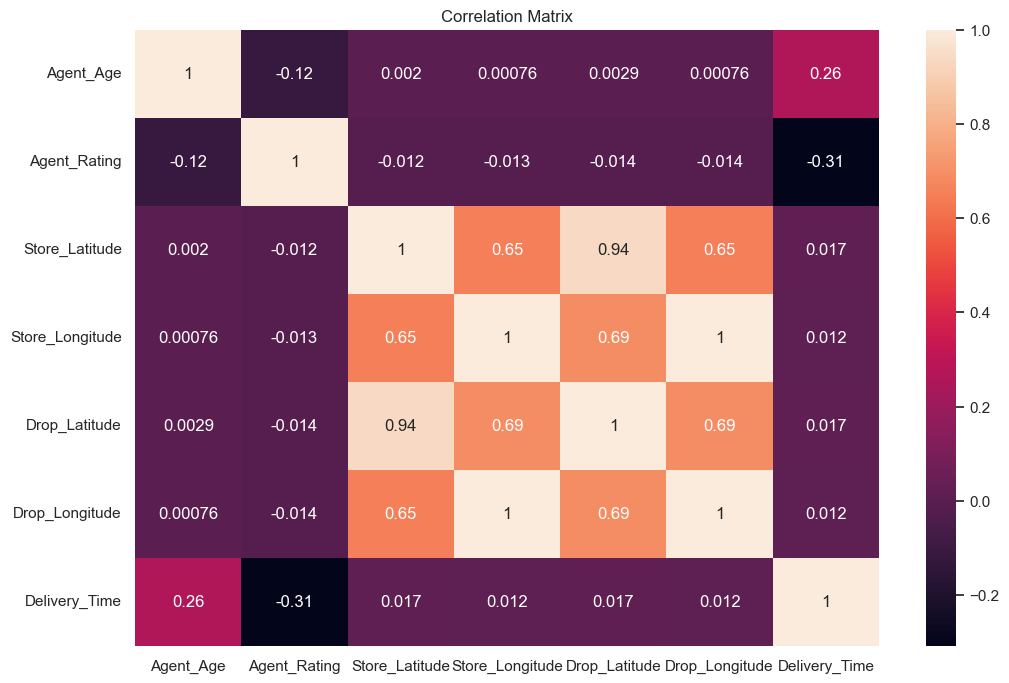

In [785]:
df_cleaned = df.dropna(subset=['Agent_Rating', 'Weather'])

numeric_cols = df_cleaned.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Since there are missing values in both the Agent_Rating and Weather columns, I excluded the incomplete data to ensure the analysis is accurate. For the subset of data with available ratings, I examined the relationship between Agent_Rating and Delivery_Time. The resulting heatmap indicates a correlation coefficient of -0.31, suggesting a weak negative correlation between these two variables.

### Q2 Which weather conditions have the greatest impact on ratings?

/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/2530900270.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/2530900270.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


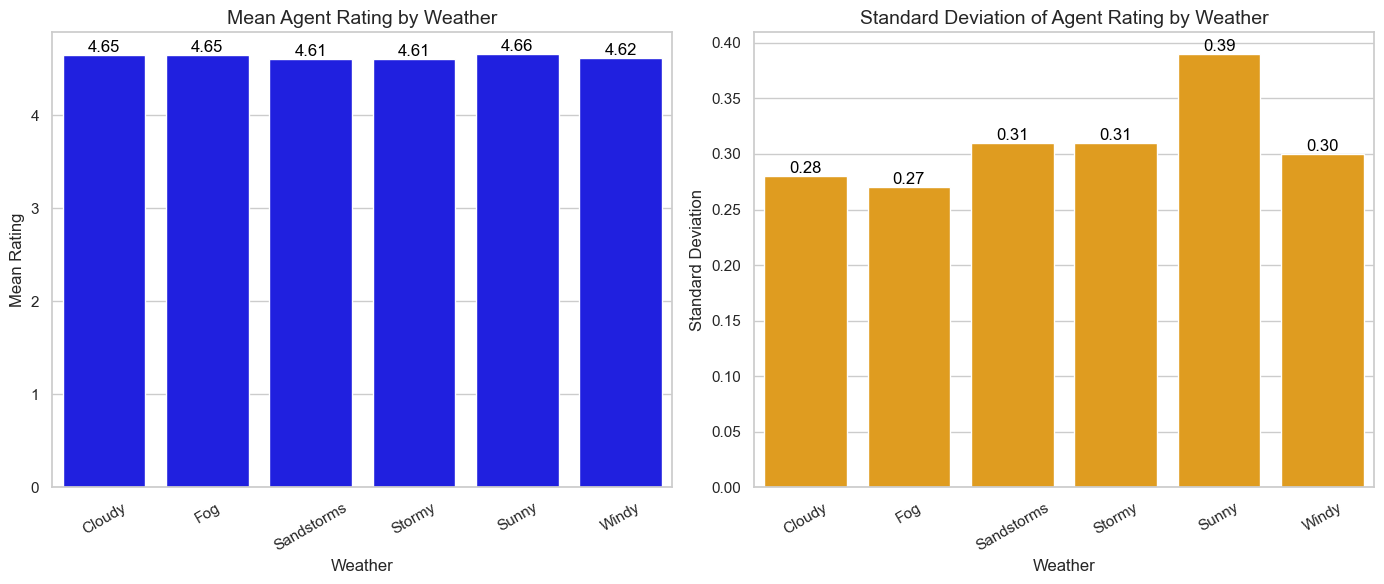

In [786]:
df_clean = df.dropna(subset=['Weather', 'Agent_Rating'])
weather_stats = df_clean.groupby('Weather')['Agent_Rating'].agg(['mean', 'std']).reset_index()
weather_stats = weather_stats.round(2)

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

sns.barplot(x='Weather', y='mean', data=weather_stats, ax=axes[0], color='Blue')
axes[0].set_title('Mean Agent Rating by Weather', fontsize=14)
axes[0].set_xlabel('Weather')
axes[0].set_ylabel('Mean Rating')

sns.barplot(x='Weather', y='std', data=weather_stats, ax=axes[1], color='Orange')
axes[1].set_title('Standard Deviation of Agent Rating by Weather', fontsize=14)
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('Standard Deviation')

for ax, metric in zip(axes, ['mean', 'std']):
    for index, row in weather_stats.iterrows():
        ax.text(row['Weather'], row[metric] , f"{row[metric]:.2f}", 
                color='black', ha='center', va='bottom', fontsize=12)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()

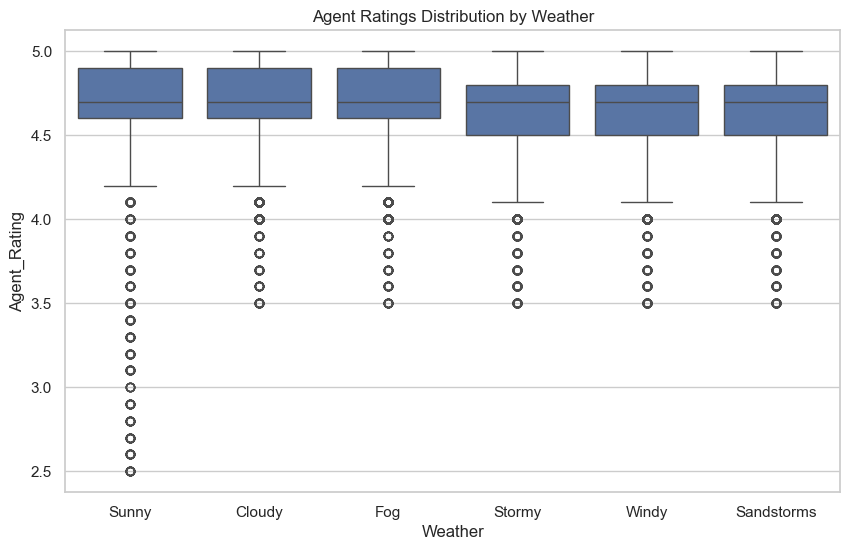

In [787]:
df_clean['Weather'].value_counts()
plt.figure(figsize=(10,6))
sns.boxplot(x='Weather', y='Agent_Rating', data=df_clean, order=['Sunny', 'Cloudy', 'Fog', 'Stormy', 'Windy', 'Sandstorms'])
plt.title("Agent Ratings Distribution by Weather")
plt.show()

In [788]:
df_clean[df_clean['Weather'] == 'Sunny']['Agent_Rating'].describe()

count    7067.000000
mean        4.659431
std         0.391203
min         2.500000
25%         4.600000
50%         4.700000
75%         4.900000
max         5.000000
Name: Agent_Rating, dtype: float64

In [789]:
weather_del = df_clean.groupby('Weather')['Delivery_Time'].agg(['mean', 'std']).reset_index()
weather_del.round(2)

,Weather,mean,std
0,Cloudy,138.31,55.48
1,Fog,136.59,57.24
2,Sandstorms,123.21,48.32
3,Stormy,123.22,47.81
4,Sunny,103.65,45.45
5,Windy,123.65,48.52


/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/776530688.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_sunny['Order_Time'] = pd.to_datetime(order_sunny['Order_Time'])
/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/776530688.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pickup_sunny['Pickup_Time'] = pd.to_datetime(pickup_sunny['Pickup_Time'])


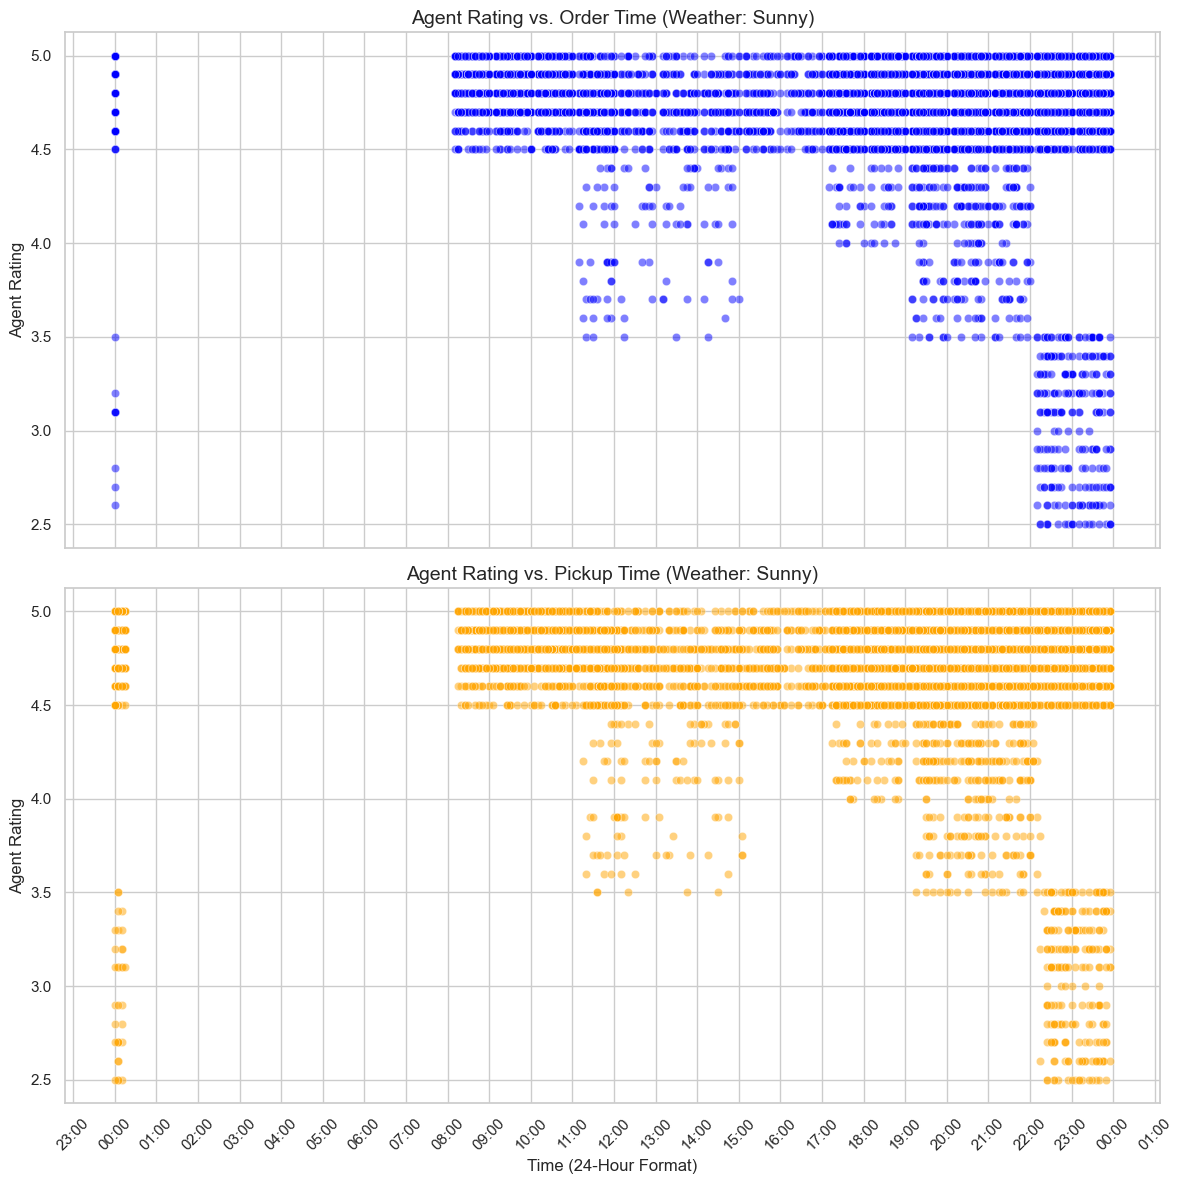

In [790]:
order_sunny = df[df['Weather'] == 'Sunny'].copy()
pickup_sunny = df[df['Weather'] == 'Sunny'].copy()

order_sunny['Order_Time'] = pd.to_datetime(order_sunny['Order_Time'])
pickup_sunny['Pickup_Time'] = pd.to_datetime(pickup_sunny['Pickup_Time'])

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

sns.scatterplot(x='Order_Time', y='Agent_Rating', data=order_sunny, alpha=0.5, color='blue', ax=axes[0])
axes[0].set_title('Agent Rating vs. Order Time (Weather: Sunny)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Agent Rating', fontsize=12)
axes[0].xaxis.set_major_locator(mdates.HourLocator(interval=1))  
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  
axes[0].tick_params(axis='x', rotation=45)

sns.scatterplot(x='Pickup_Time', y='Agent_Rating', data=pickup_sunny, alpha=0.5, color='orange', ax=axes[1])
axes[1].set_title('Agent Rating vs. Pickup Time (Weather: Sunny)', fontsize=14)
axes[1].set_xlabel('Time (24-Hour Format)', fontsize=12)
axes[1].set_ylabel('Agent Rating', fontsize=12)
axes[1].xaxis.set_major_locator(mdates.HourLocator(interval=1))  
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/4257705122.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Order_Time'] = pd.to_datetime(df_clean['Order_Time'])
/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/4257705122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Order_Time'] = pd.to_datetime(df_clean['Order_Time'])
/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/4257705122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

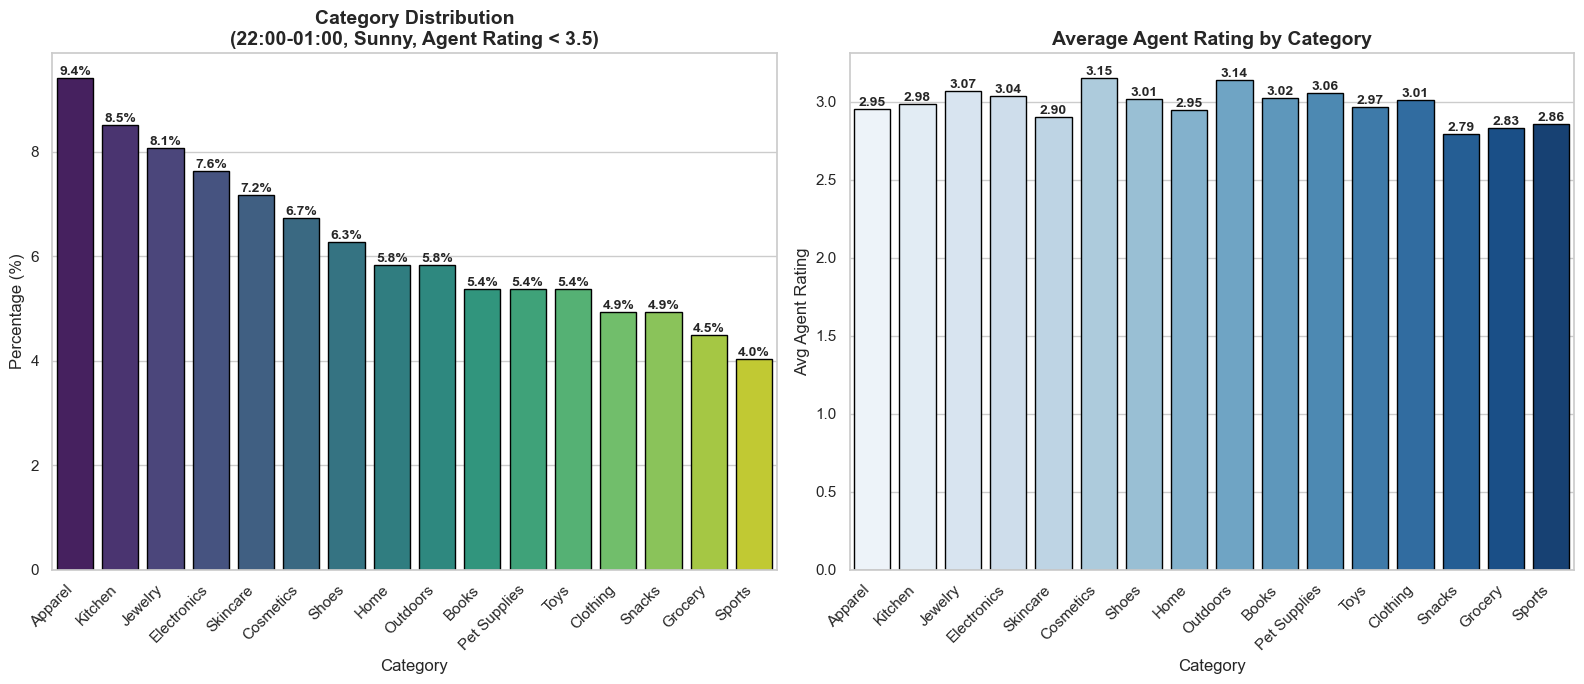

In [791]:
df_clean['Order_Time'] = pd.to_datetime(df_clean['Order_Time'])
df_clean['Hour'] = df_clean['Order_Time'].dt.hour
filtered_df = df_clean[(df_clean['Weather'] == 'Sunny') & ((df_clean['Hour'] >= 22) | (df_clean['Hour'] < 1)) & (df_clean['Agent_Rating'] < 3.5)]

category_counts = filtered_df['Category'].value_counts(normalize=True) * 100

category_stats = filtered_df.groupby('Category')['Agent_Rating'].agg(['mean', 'std'])

category_summary = pd.DataFrame({
    'Percentage (%)': category_counts,
    'Avg_Agent_Rating': category_stats['mean'],
    'Std_Agent_Rating': category_stats['std']
}).reset_index().rename(columns={'index': 'Category'})

category_summary = category_summary.sort_values(by='Percentage (%)', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(x='Category', y='Percentage (%)', data=category_summary, 
            palette='viridis', edgecolor='black', linewidth=1, ax=axes[0])

for i, v in enumerate(category_summary['Percentage (%)']):
    axes[0].text(i, v, f'{v:.1f}%', 
                 ha='center', va='bottom', 
                 fontweight='bold', fontsize=10)

axes[0].set_title('Category Distribution\n(22:00-01:00, Sunny, Agent Rating < 3.5)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].set_xticklabels(category_summary['Category'], rotation=45, ha='right')
sns.barplot(x='Category', y='Avg_Agent_Rating', data=category_summary, 
            palette='Blues', edgecolor='black', linewidth=1, ax=axes[1])

for i, v in enumerate(category_summary['Avg_Agent_Rating']):
    axes[1].text(i, v, f'{v:.2f}', 
                 ha='center', va='bottom', 
                 fontweight='bold', fontsize=10)

axes[1].set_title('Average Agent Rating by Category', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Avg Agent Rating', fontsize=12)
axes[1].set_xticklabels(category_summary['Category'], rotation=45, ha='right')

plt.tight_layout()
fig.patch.set_facecolor('white')
plt.show()

When clear weather is the most influential weather condition on ratings, the average rating is the highest among all weather conditions. However, the standard deviation is relatively large, indicating greater variability in the ratings. From a delivery time perspective, clear weather corresponds to the shortest delivery times, suggesting that delivery time is unlikely to be the primary factor influencing ratings. However, upon further analyzing the order and pickup times, I found that all low ratings were concentrated in the time window from 22:00 to 00:00. By focusing on this time period and listing items with ratings below 3.5, I discovered that most of these items were from the Apparel category, followed by Kitchen items and then Jewelry. My hypothesis is that customers ordering these products may have urgent needs for them the following day and expect faster delivery on clear days. This unmet expectation could lead to lower satisfaction, thereby affecting their ratings.

### Q3 Are there significant differences in Delivery Time across different time periods (e.g., morning, afternoon, evening)?

In [792]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])
df['Order_Weekday'] = df['Order_Date'].dt.weekday
df['Day_Type'] = df['Order_Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['Pickup_Period'] = df['Pickup_Time'].dt.hour.apply(time_of_day)

df.head()

/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/3046806718.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_Weekday,Day_Type,Pickup_Period
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,2025-01-26 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,5,Weekend,Morning
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,2025-01-26 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4,Weekday,Evening
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,2025-01-26 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,5,Weekend,Morning
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,2025-01-26 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,1,Weekday,Evening
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,2025-01-26 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,5,Weekend,Afternoon


/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/4027888536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pickup_Period', y='Delivery_Time', data=pickup_efficiency, palette='viridis')


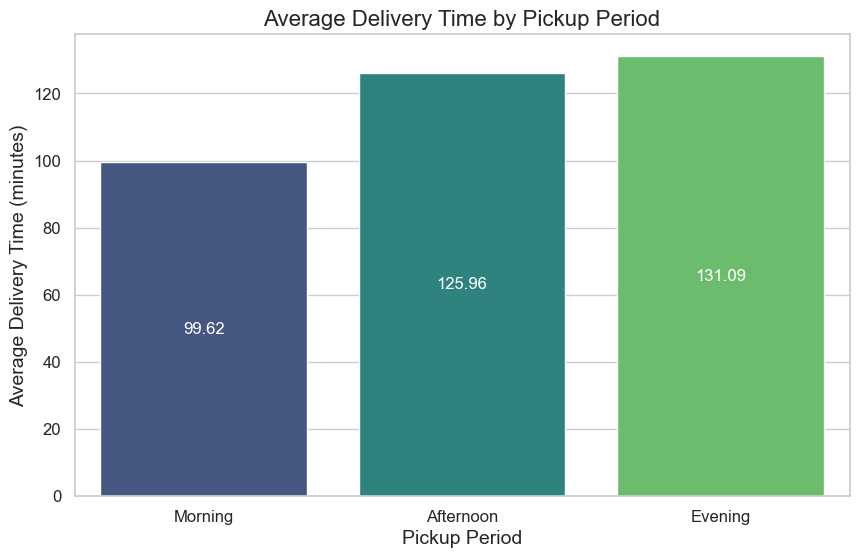

In [793]:
pickup_efficiency = df.groupby('Pickup_Period')['Delivery_Time'].mean().reset_index()
pickup_order = ['Morning', 'Afternoon', 'Evening']
pickup_efficiency['Pickup_Period'] = pd.Categorical(pickup_efficiency['Pickup_Period'], categories=pickup_order, ordered=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Pickup_Period', y='Delivery_Time', data=pickup_efficiency, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  
                ha='center', va='center', 
                fontsize=12, color='white', 
                xytext=(0, 0), textcoords='offset points') 

plt.title('Average Delivery Time by Pickup Period', fontsize=16)
plt.xlabel('Pickup Period', fontsize=14)
plt.ylabel('Average Delivery Time (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [794]:
from scipy.stats import f_oneway, kruskal
groups = df.groupby("Pickup_Period")["Delivery_Time"].apply(list)

# 單因素 ANOVA
anova_result = f_oneway(*groups)
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Kruskal-Wallis 檢定
kruskal_result = kruskal(*groups)
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

F-statistic: 1127.7602815276982
p-value: 0.0
H-statistic: 2342.557113236015
p-value: 0.0


Based on the average delivery times across the three time periods, it is evident that morning deliveries are approximately 25 to 30 minutes faster than those in other time periods. Therefore, we recommend that users consider scheduling pickups in the morning to improve delivery efficiency.

### Q4 Does the delivery date (weekday vs. weekend) affect Delivery Time?

/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/824225253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day_Type', y='Mean_Delivery_Time', data=day_type_efficiency, palette='viridis')


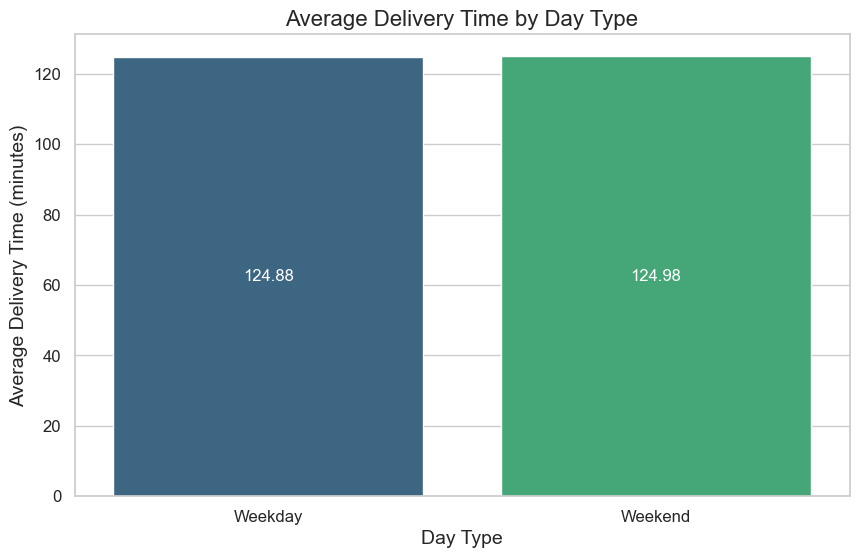

In [795]:
day_type_efficiency = df.groupby('Day_Type')['Delivery_Time'].agg(['mean', 'std']).reset_index()
day_type_efficiency.columns = ['Day_Type', 'Mean_Delivery_Time', 'Std_Deviation']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day_Type', y='Mean_Delivery_Time', data=day_type_efficiency, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  
                ha='center', va='center', 
                fontsize=12, color='white',  
                xytext=(0, 0), textcoords='offset points')  

plt.title('Average Delivery Time by Day Type', fontsize=16)
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Average Delivery Time (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [796]:
day_type_efficiency.round(2)

,Day_Type,Mean_Delivery_Time,Std_Deviation
0,Weekday,124.88,52.10
1,Weekend,124.98,51.42


Based on the mean and standard deviation, neither weekdays nor weekends have a significant impact on delivery times.

### Q5 Which product categories have the longest average Delivery Time?

/var/folders/b0/dtr0pq710lj8c2r2f71dwfcr0000gn/T/ipykernel_55255/3083559622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Delivery_Time', y='Category', data=category_efficiency, palette='viridis')


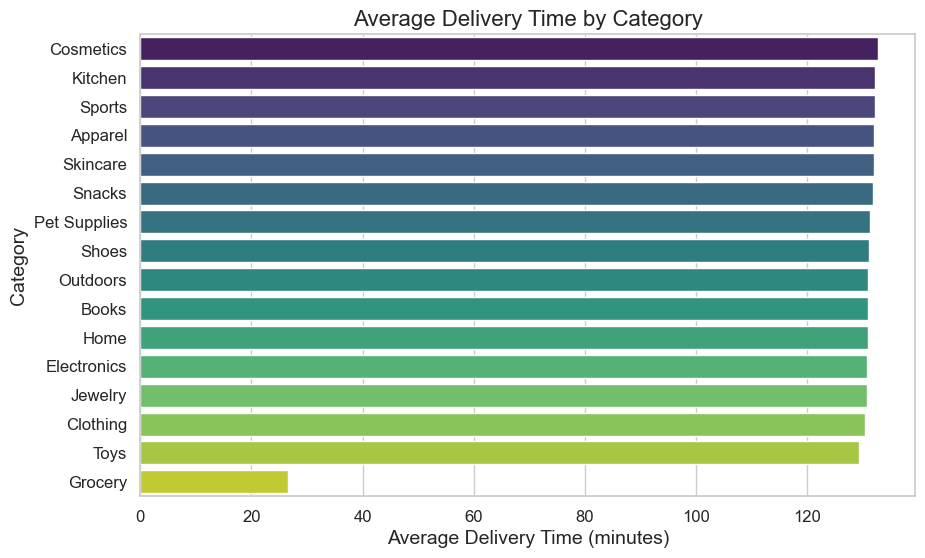

In [797]:
category_efficiency = df.groupby('Category')['Delivery_Time'].mean().reset_index()
category_efficiency = category_efficiency.rename(columns={'Delivery_Time': 'Avg_Delivery_Time'})
category_efficiency = category_efficiency.sort_values(by='Avg_Delivery_Time', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='Avg_Delivery_Time', y='Category', data=category_efficiency, palette='viridis')

plt.title('Average Delivery Time by Category', fontsize=16)
plt.xlabel('Average Delivery Time (minutes)', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [798]:
category_efficiency.round(2)

,Category,Avg_Delivery_Time
3,Cosmetics,132.90
8,Kitchen,132.33
14,Sports,132.25
0,Apparel,132.05
12,Skincare,132.03
13,Snacks,131.90
10,Pet Supplies,131.29
11,Shoes,131.15
9,Outdoors,131.06
1,Books,131.02


Based on the average delivery times for each product, except for Grocery, which can be delivered in a shorter time, other products have delivery times ranging from 129 to 132 minutes. Therefore, there is no clear product category that requires significantly longer delivery times.

### Q6 How does the type of city (Area) impact delivery efficiency, and why?

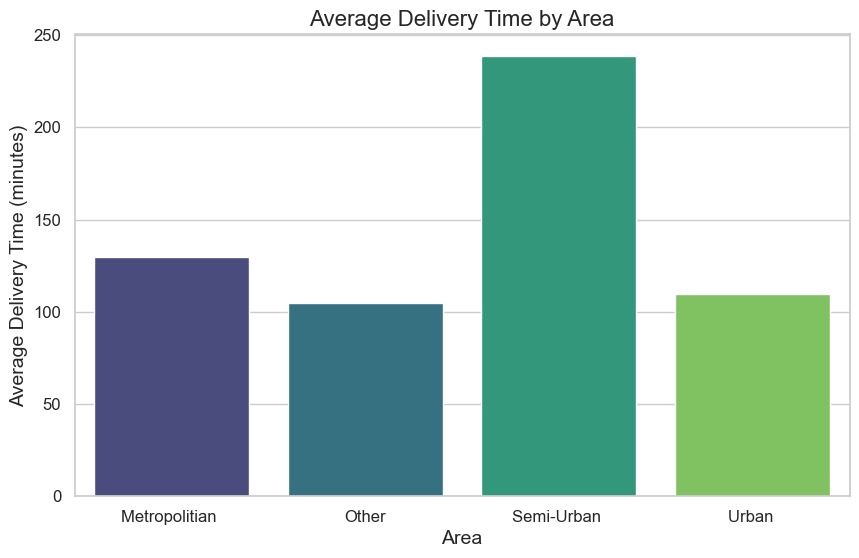

In [799]:
area_efficiency = df.groupby('Area')['Delivery_Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Delivery_Time', data=area_efficiency, hue='Area', palette='viridis')

plt.title('Average Delivery Time by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Delivery Time (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

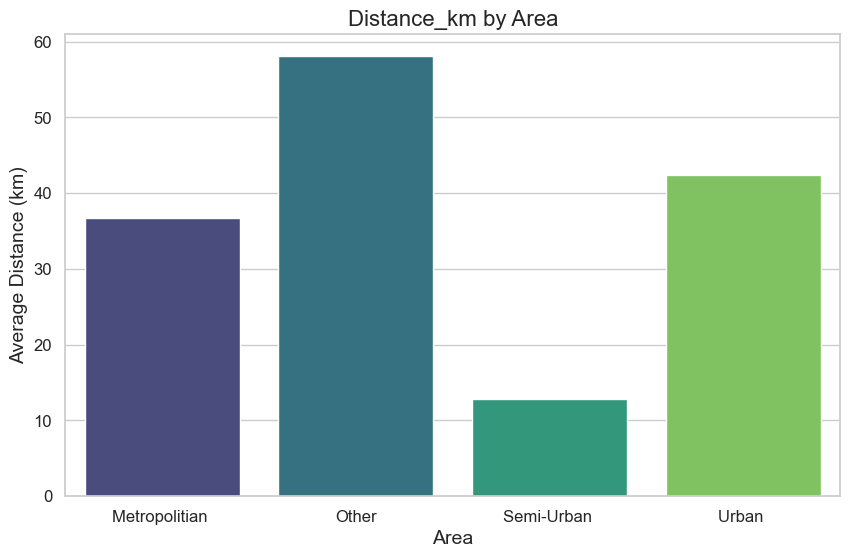

In [800]:
from geopy.distance import geodesic

df['Distance_km'] = df.apply(lambda row: geodesic(
    (row['Store_Latitude'], row['Store_Longitude']),
    (row['Drop_Latitude'], row['Drop_Longitude'])
).kilometers, axis=1)

area_distance = df.groupby('Area')['Distance_km'].mean().reset_index()
area_distance = area_distance.rename(columns={'Distance_km': 'Avg_Distance'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Avg_Distance', data=area_distance, hue='Area', palette='viridis', legend=False)

plt.title('Distance_km by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Distance (km)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


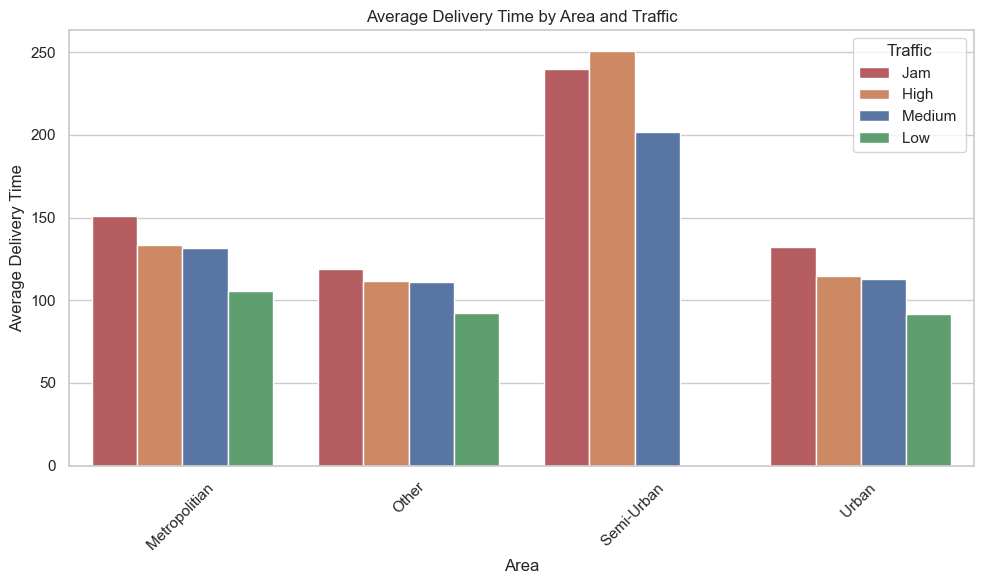

In [801]:
area_traffic_avg = df.groupby(['Area', 'Traffic'])['Delivery_Time'].mean().reset_index()

traffic_order = ['Jam ', 'High ', 'Medium ', 'Low ']
traffic_colors = {'Jam ': '#c44e52', 'High ': '#dd8452', 'Medium ': '#4c72b0', 'Low ': '#55a868'}

plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Delivery_Time', hue='Traffic', data=area_traffic_avg, 
            hue_order=traffic_order, palette=traffic_colors)

plt.title('Average Delivery Time by Area and Traffic')
plt.xlabel('Area')
plt.ylabel('Average Delivery Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


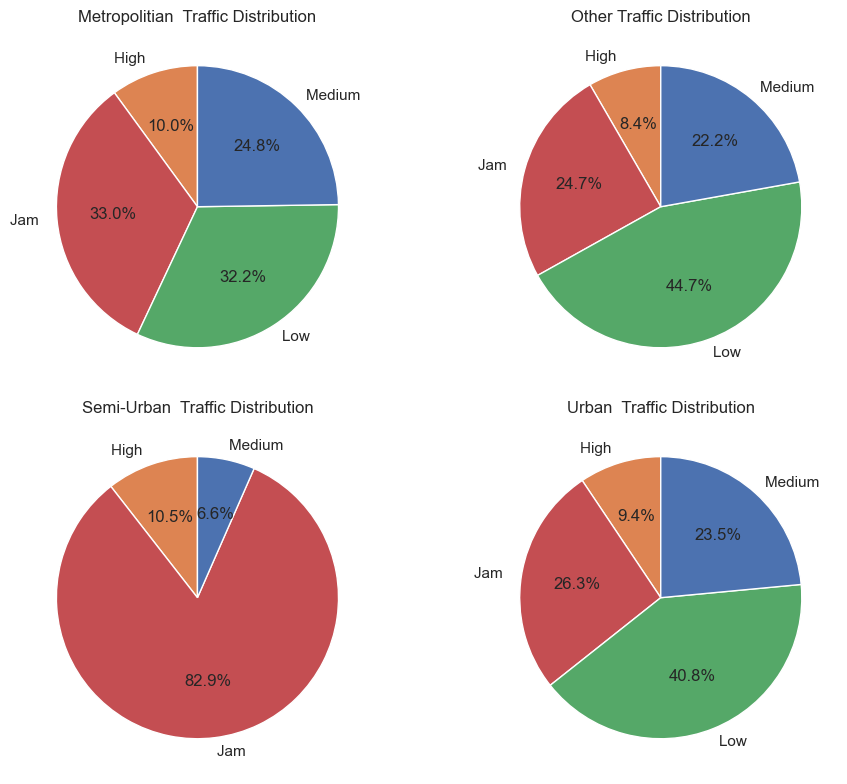

In [802]:
area_traffic_count = df.groupby(['Area', 'Traffic'])['Delivery_Time'].size().reset_index(name='Count')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

areas = area_traffic_count['Area'].unique()
for i, area in enumerate(areas):
    ax = axes[i // 2, i % 2] 
    area_data = area_traffic_count[area_traffic_count['Area'] == area]
    colors = [traffic_colors[t] for t in area_data['Traffic']]
    ax.pie(area_data['Count'], labels=area_data['Traffic'], autopct='%1.1f%%', 
           startangle=90, colors=colors) 
    ax.set_title(f'{area} Traffic Distribution')

plt.tight_layout()
plt.show()


The delivery time in the Semi-Urban area is nearly twice as long as in other areas, yet interestingly, its delivery distance is much shorter. After analyzing delivery times for different product categories, I found that the product type does not significantly affect delivery times across different areas. Therefore, I shifted my focus to analyzing traffic conditions. I discovered that there are no records of low-traffic deliveries in the Semi-Urban area. Moreover, after observing the traffic distribution, it became evident that over 80% of traffic situations in this region are congested. This is likely the primary reason for the extended delivery times. To improve this situation, it may be necessary to analyze the delivery routes, identify the sections causing the congestion, and explore whether it is possible to avoid these areas.